# Data Analyst Job Postings Analysis

## Import Needed Libraries

In [1]:
#import needed libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import urllib.parse 
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import style
%matplotlib inline

## Extract Webpage Content

In [2]:
#store website into a variable
website = 'https://ai-jobs.net/analyst-jobs/'

In [3]:
#make request to the website specified above
response = requests.get(website)

In [4]:
#confirm if the request made was successful
response.status_code

200

In [5]:
#create a soup object to get access to the html content of the website
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
# view soup content
soup

<!DOCTYPE html>

<html class="h-100" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots">
<meta content="Jobs in AI/ML and Big Data - find open Analyst roles." name="description"/>
<title>Find Analyst Jobs | ai-jobs.net</title>
<link href="/static/css/style_ai.min.css?v=1.4.1" rel="stylesheet"/>
<link href="/static/fa/css/all.min.css?v=5.13.0" rel="stylesheet"/>
<link href="https://ai-jobs.net/analyst-jobs/" rel="canonical"/>
<link href="https://insights.ai-jobs.net" rel="dns-prefetch"/>
<link href="https://salaries.ai-jobs.net" rel="dns-prefetch"/>
<link href="https://ai-jobs.net/feed/" rel="alternate" title="ai-jobs.net - Job feed" type="application/rss+xml"/>
<link href="/static/img/favicons_ai/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/static/img/favicons_ai/apple-icon-60x60.png" rel=

In [7]:
#start to store the website content in a variable 
results = soup.find('div', {'class':'list-group list-group-flush mb-5'})
results

<div class="list-group list-group-flush mb-5" id="job-list">
<div class="list-group-item px-2 px-lg-3 py-0">
<div class="row">
<div class="col-2 col-sm-1 px-2 py-3">
<a href="/jobs-at-amica-mutual-insurance-company/" title="Show all open positions at Amica Mutual Insurance Company">
<img alt="Amica Mutual Insurance Company logo" class="mx-auto my-1 d-block" height="48" loading="lazy" src="/media/cache/39/95/39951b7ffbfd5608fb202f6de1e0ca38.jpg" width="48"/>
</a>
<div class="d-flex justify-content-center mt-3">
<a class="btn-direct-apply text-dark p-1" href="/J24108/apply/" id="24108" rel="nofollow noopener" target="_blank" title="Apply for this job directly on Amica Mutual Insurance Company's career site"><i class="fas fa-edit"></i></a>
<a class="btn-direct-apply text-dark p-1" href="/job/mark/24108/create/" rel="nofollow" title="Save this job for later application"><i class="fas fa-list-ol"></i></a>
</div>
</div>
<a class="col list-group-item-action px-2 py-3" href="/job/24108-busines

In [8]:
results

<div class="list-group list-group-flush mb-5" id="job-list">
<div class="list-group-item px-2 px-lg-3 py-0">
<div class="row">
<div class="col-2 col-sm-1 px-2 py-3">
<a href="/jobs-at-amica-mutual-insurance-company/" title="Show all open positions at Amica Mutual Insurance Company">
<img alt="Amica Mutual Insurance Company logo" class="mx-auto my-1 d-block" height="48" loading="lazy" src="/media/cache/39/95/39951b7ffbfd5608fb202f6de1e0ca38.jpg" width="48"/>
</a>
<div class="d-flex justify-content-center mt-3">
<a class="btn-direct-apply text-dark p-1" href="/J24108/apply/" id="24108" rel="nofollow noopener" target="_blank" title="Apply for this job directly on Amica Mutual Insurance Company's career site"><i class="fas fa-edit"></i></a>
<a class="btn-direct-apply text-dark p-1" href="/job/mark/24108/create/" rel="nofollow" title="Save this job for later application"><i class="fas fa-list-ol"></i></a>
</div>
</div>
<a class="col list-group-item-action px-2 py-3" href="/job/24108-busines

In [9]:
# focus on needed information
needed_info = results.find_all('a', {'class':'col list-group-item-action px-2 py-3'})
needed_info

[<a class="col list-group-item-action px-2 py-3" href="/job/24108-business-intelligence-analyst/" title="View full details of `Business Intelligence Analyst` vacancy">
 <div class="float-right text-right d-inline-block w-25 ml-2">
 <span class="d-block d-md-none text-break job-list-item-location">Lincoln, RI, 02865</span>
 <span class="d-none d-md-block text-break job-list-item-location">Lincoln, RI, 02865</span>
 <span class="badge badge-secondary badge-pill my-md-1">Full Time</span>
 <div class="d-block">
 <span class="badge badge-info badge-pill my-md-1 d-md-none">Mid</span>
 <span class="badge badge-info badge-pill my-md-1 d-none d-md-inline-block">Mid-level</span>
 </div>
 </div>
 <p class="m-0 text-muted job-list-item-company">Amica Mutual Insurance Company</p>
 <h2 class="h4 mb-1">Business Intelligence Analyst</h2>
 <span class="badge badge-light badge-pill">Business Intelligence</span>
 <span class="badge badge-light badge-pill">Data management</span>
 <span class="badge badge-

In [10]:
needed_info

[<a class="col list-group-item-action px-2 py-3" href="/job/24108-business-intelligence-analyst/" title="View full details of `Business Intelligence Analyst` vacancy">
 <div class="float-right text-right d-inline-block w-25 ml-2">
 <span class="d-block d-md-none text-break job-list-item-location">Lincoln, RI, 02865</span>
 <span class="d-none d-md-block text-break job-list-item-location">Lincoln, RI, 02865</span>
 <span class="badge badge-secondary badge-pill my-md-1">Full Time</span>
 <div class="d-block">
 <span class="badge badge-info badge-pill my-md-1 d-md-none">Mid</span>
 <span class="badge badge-info badge-pill my-md-1 d-none d-md-inline-block">Mid-level</span>
 </div>
 </div>
 <p class="m-0 text-muted job-list-item-company">Amica Mutual Insurance Company</p>
 <h2 class="h4 mb-1">Business Intelligence Analyst</h2>
 <span class="badge badge-light badge-pill">Business Intelligence</span>
 <span class="badge badge-light badge-pill">Data management</span>
 <span class="badge badge-

In [11]:
# check number of entries
len(needed_info)

100

Comment
    
    10 more jobs added from the last time srapping was done

In [12]:
# take a peep into sample of the needed_info
needed_info[12]

<a class="col list-group-item-action px-2 py-3" href="/job/26583-senior-data-analyst/" title="View full details of `Senior Data Analyst` vacancy">
<div class="float-right text-right d-inline-block w-25 ml-2">
<span class="d-block d-md-none text-break job-list-item-location">London, England, United Kingdom …</span>
<span class="d-none d-md-block text-break job-list-item-location">London, England, United Kingdom - Remote</span>
<span class="badge badge-secondary badge-pill my-md-1">Full Time</span>
<div class="d-block">
<span class="badge badge-info badge-pill my-md-1 d-md-none">Mid</span>
<span class="badge badge-info badge-pill my-md-1 d-none d-md-inline-block">Mid-level</span>
</div>
<div class="d-block">
<span class="badge badge-success badge-pill d-none d-md-inline-block">USD 51K - 90K *</span>
<span class="badge badge-success badge-pill d-md-none">USD 51K+ *</span>
</div>
</div>
<p class="m-0 text-muted job-list-item-company">FitXR</p>
<h2 class="h4 mb-1">Senior Data Analyst</h2>
<

In [13]:
#pulling out content from each index of the list 
needed_info[0].find('span', {'class':'badge badge-secondary badge-pill my-md-1'}).get_text()

'Full Time'

## Extracting Content from Each Element of in Need_Info: Test

### Title

In [14]:
# Approach 1
needed_info[0].find('h2', {'class':'h4 mb-1'}).string

'Business Intelligence Analyst'

In [15]:
# Approach 2. Use when you are sure there is only one of h2 in the webpage content
needed_info[0].h2.string

'Business Intelligence Analyst'

In [16]:
# Approach 3
needed_info[0].find('h2', {'class':'h4 mb-1'}).get_text()

'Business Intelligence Analyst'

In [17]:
# Approach 4. Use when you are sure there is only one of h2 in the webpage content
needed_info[0].h2.get_text()

'Business Intelligence Analyst'

### Skill

In [18]:
# Loop to get skills list. Approah 1
[x.get_text() for x in needed_info[0].find_all('span', 'badge badge-light badge-pill')]

['Business Intelligence',
 'Data management',
 'Power BI',
 'Python',
 'R',
 'SAS',
 'SQL',
 '+2']

In [19]:
# Loop to get skills list. Approah 2
skill_list =[]
for i in needed_info[0].find_all('span', {'class':'badge badge-light badge-pill'}):
    g = i.get_text()
    skill_list.append(g)
skill_list

['Business Intelligence',
 'Data management',
 'Power BI',
 'Python',
 'R',
 'SAS',
 'SQL',
 '+2']

### Benefits

In [20]:
# Loop to get benefits list. Approah 1
[j.string for j in needed_info[0].find_all('span', 'badge badge-success badge-pill')]
# note the class is not stated. Only a comma between the span and class name

['Competitive pay',
 'Conferences',
 'Fitness / gym',
 'Health care',
 'Insurance',
 '+3']

In [21]:
# Loop to get benefits list. Approah 2
[j.string for j in needed_info[0].find_all('span', {'class':'badge badge-success badge-pill'})]
# note the class is stated and followed by a column before the class name in quotation marks

['Competitive pay',
 'Conferences',
 'Fitness / gym',
 'Health care',
 'Insurance',
 '+3']

### Company

In [22]:
needed_info[0].find('p', {'class':'m-0 text-muted job-list-item-company'}).get_text()

'Amica Mutual Insurance Company'

In [23]:
needed_info[0].find('p', {'class':'m-0 text-muted job-list-item-company'}).string

'Amica Mutual Insurance Company'

### Location

In [24]:
needed_info[0].find('span', 'd-block d-md-none text-break job-list-item-location').get_text()

'Lincoln, RI, 02865'

### Job Type

In [25]:
needed_info[0].find('span', 'badge badge-secondary badge-pill my-md-1').string

'Full Time'

### Level

In [26]:
needed_info[0].find('span', 'badge badge-info badge-pill my-md-1 d-none d-md-inline-block').get_text()

'Mid-level'

### Salary

In [27]:
needed_info[12].find('span', 'badge badge-success badge-pill d-md-none').string

'USD 51K+ *'

## Job Type

In [28]:
needed_info[0].find('span', 'badge badge-secondary badge-pill my-md-1').get_text()

'Full Time'

## Creating Data Frame by Looping Over Entire Needed_Info Content

In [29]:
# create empty lists of variables to tbe extracted
job_title = []
company = []
location = []
level = []
job_type = []
salary = []
skills = []
benefits = []


# loop over the soup content to extract required information
for needed_info in needed_info:
    try:
        job_title.append(needed_info.find('h2', {'class':'h4 mb-1'}).get_text())
    except:
        job_title.append('not_stated')
        
    try:
        company.append(needed_info.find('p', {'class':'m-0 text-muted job-list-item-company'}).get_text())
    except:
        company.append('not_stated')
    
    try:
        location.append(needed_info.find('span', {'class':'d-block d-md-none text-break job-list-item-location'}).get_text())
    except:
        location.append('not_stated')
        
    try:
        level.append(needed_info.find('span', {'class':'badge badge-info badge-pill my-md-1 d-none d-md-inline-block'}).get_text())
    except:
        level.append('not_stated')
    
    try:
        job_type.append(needed_info.find('span', {'class':'badge badge-secondary badge-pill my-md-1'}).get_text())
    except:
        job_type.append('not_stated')
        
    try:
        salary.append(needed_info.find('span', {'class':'badge badge-success badge-pill d-md-none'}).get_text()) 
    except:
        salary.append('not_stated')
    
    try:
        skills.append([x.get_text() for x in needed_info.find_all('span', {'class':'badge badge-light badge-pill'})])
    except:
        skills.append('not_stated')
    
    try:
        benefits.append([j.string for j in needed_info.find_all('span', {'class':'badge badge-success badge-pill'})])
    except:
        benefits.append('not_stated')

In [30]:
# view salary column
salary

['not_stated',
 'not_stated',
 'USD 30K+ *',
 'not_stated',
 'USD 180K+',
 'USD 50K+ *',
 'not_stated',
 'USD 68K+ *',
 'USD 50K+ *',
 'not_stated',
 'not_stated',
 'not_stated',
 'USD 51K+ *',
 'USD 51K+ *',
 'USD 50K+ *',
 'not_stated',
 'USD 80K+',
 'USD 50K+ *',
 'USD 30K+ *',
 'USD 50K+ *',
 'USD 90K+',
 'USD 50K+ *',
 'USD 152K+',
 'not_stated',
 'not_stated',
 'USD 76K+ *',
 'not_stated',
 'USD 51K+ *',
 'USD 50K+ *',
 'USD 51K+ *',
 'USD 51K+ *',
 'not_stated',
 'not_stated',
 'USD 50K+ *',
 'USD 50K+ *',
 'not_stated',
 'not_stated',
 'USD 50K+ *',
 'not_stated',
 'USD 50K+ *',
 'USD 50K+ *',
 'not_stated',
 'USD 68K+ *',
 'USD 51K+ *',
 'not_stated',
 'USD 50K+ *',
 'USD 50K+ *',
 'not_stated',
 'not_stated',
 'USD 50K+ *',
 'USD 50K+ *',
 'USD 50K+ *',
 'USD 50K+ *',
 'USD 51K+ *',
 'USD 50K+ *',
 'not_stated',
 'USD 50K+ *',
 'USD 51K+ *',
 'USD 50K+ *',
 'not_stated',
 'USD 51K+ *',
 'USD 50K+ *',
 'USD 51K+ *',
 'USD 50K+ *',
 'not_stated',
 'USD 50K+ *',
 'USD 50K+ *',
 

In [31]:
#give column header names to each columns
df = pd.DataFrame({'job_title': job_title, 'company': company, 'location': location, 'level':level,
                        'job_type': job_type, 'salary_range': salary, 'required_skills': skills, 'benefits': benefits})

In [32]:
df

,job_title,company,location,level,job_type,salary_range,required_skills,benefits
0,Business Intelligence Analyst,Amica Mutual Insurance Company,"Lincoln, RI, 02865",Mid-level,Full Time,not_stated,"[Business Intelligence, Data management, Power...","[Competitive pay, Conferences, Fitness / gym, ..."
1,Lead Business Intelligence Analyst,Amica Mutual Insurance Company,"Lincoln, RI, 02865",Senior-level,Full Time,not_stated,"[Business Intelligence, Data management, KPIs,...","[Competitive pay, Conferences, Fitness / gym, ..."
2,Junior Data Analyst,Nielsen,Poland,Entry-level,Full Time,USD 30K+ *,"[Consulting, Data analysis, Econometrics, Exce...",[Career development]
3,"Senior Vice President, Data Analytics & BI",Athletic Greens,"Los Angeles, California, United …",Senior-level,Full Time,not_stated,"[Airflow, BigQuery, Business Intelligence, Dat...","[401(k) matching, Flex vacation, Gear, Health ..."
4,"Staff Analytics Engineer, Central Data",Airbnb,United States,Senior-level,Full Time,USD 180K+,"[Airflow, Data analysis, Engineering, ETL, Mac...","[Career development, Salary bonus]"
...,...,...,...,...,...,...,...,...
95,Sr. Data Analyst (CMG Analytics),Coupang,"Seoul, South Korea",Senior-level,Full Time,USD 50K+ *,"[Airflow, E-commerce, Looker, Power BI, Python...",[]
96,"Sr. Data Analyst, Marketing",Clari,"Seattle, WA",Senior-level,Full Time,USD 50K+ *,"[A/B testing, Consulting, Finance, Python, R, ...","[Equity, Fertility benefits, Flex hours, Paren..."
97,Consumer Research & Data Analyst,Mintel,Chicago,Senior-level,Full Time,USD 50K+ *,"[Data analysis, Data Analytics, Finance, R, Re...",[Career development]
98,Insight Analyst,So Energy,United Kingdom,Mid-level,Full Time,not_stated,"[Agile, BigQuery, Consulting, Data analysis, D...","[Career development, Competitive pay]"


In [33]:
# export extracted dataset
df.to_csv('Data-Analyst-Job-Postings.csv')

In [34]:
# view statistical summary
df.describe()

,job_title,company,location,level,job_type,salary_range,required_skills,benefits
count,100,100,100,100,100,100,100,100
unique,77,76,74,5,2,10,99,62
top,Data Analyst,Amazon.com,Remote,Senior-level,Full Time,USD 50K+ *,"[Data Analytics, Data visualization, Industria...",[]
freq,12,5,8,69,99,43,2,24


# Define Plot Functions

### Function 1

In [35]:
# define function name and arguments
def barplot (data, title, ylabel):
    # define figure size
    plt.figure(figsize=(17,9))
    # define style to use
    style.use('seaborn')
    # define chart type / plot data of interest
    data.value_counts().plot(kind='bar')
    # set chart title
    plt.title(title, fontsize=25)
    # set y-axis label
    plt.ylabel(ylabel, fontsize=15);

#### 1. What is the Job Distribution by Title?

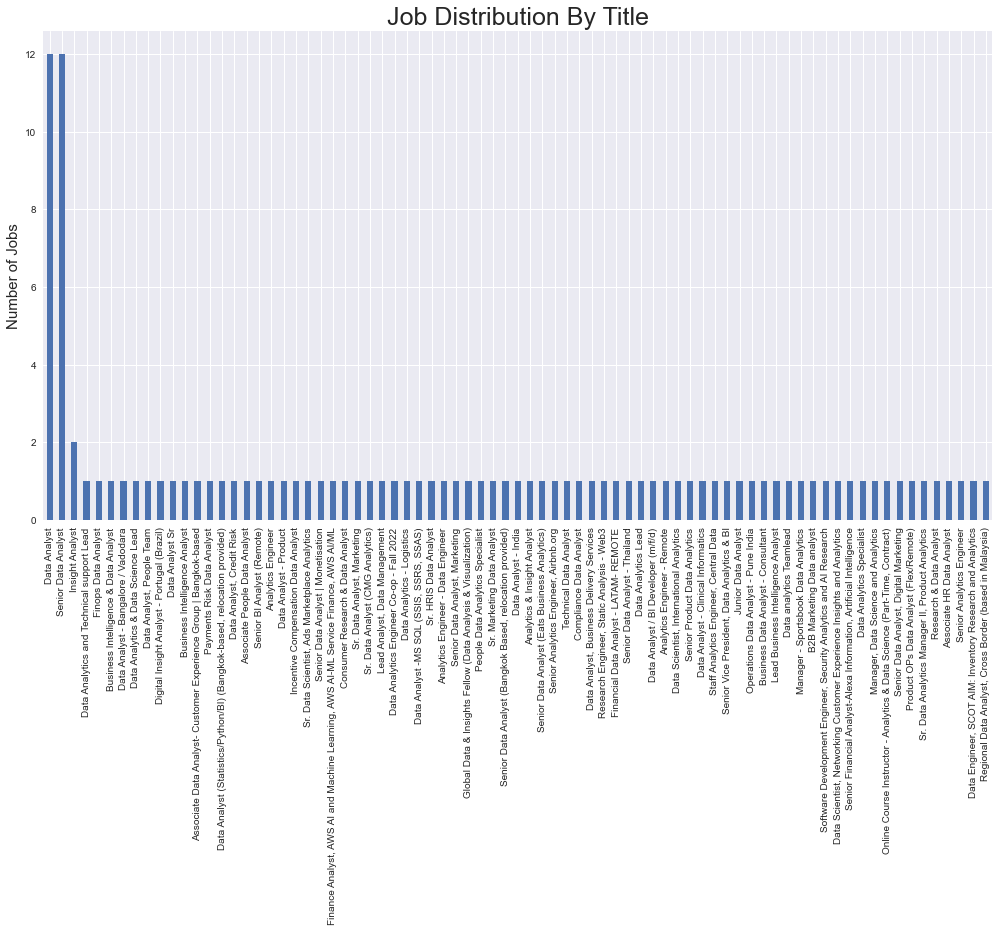

In [36]:
barplot (df['job_title'], 'Job Distribution By Title', 'Number of Jobs')

Comment

    The roles come captioned in diverse forms as the company sees fit. So be on the look out

#### 2. What is the Job Posting Distribution By Company?

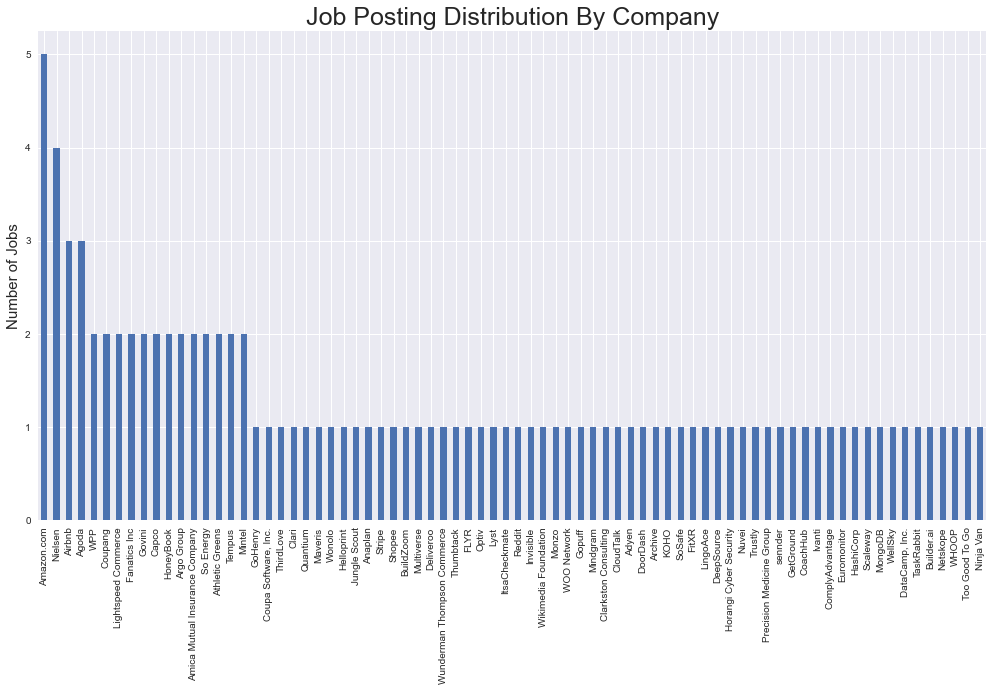

In [37]:
barplot(df['company'], 'Job Posting Distribution By Company', 'Number of Jobs')

Comment

    The highest recruiters are Amazon, Nielsen, Airbnb and WPP. As a newbie, you might want to tailor your learning path to 
    suit what these companies require.

#### 3. What is the Job Posting Distribution By Location?

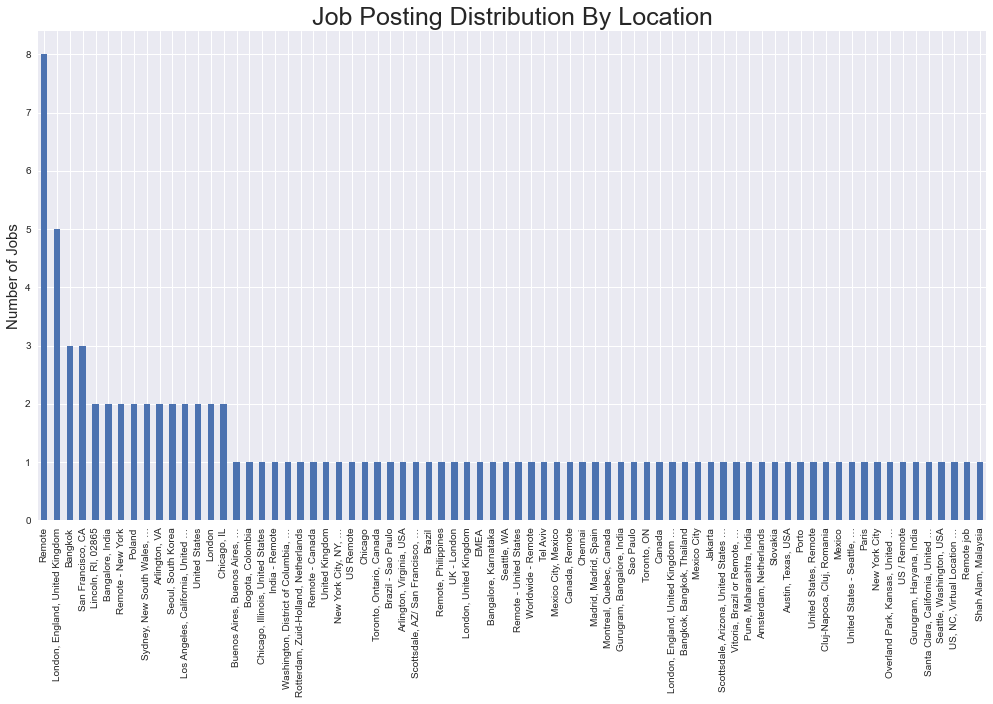

In [38]:
barplot(df['location'], 'Job Posting Distribution By Location', 'Number of Jobs')

Comment

    Most job posting are remote. That is good news for all who seek to work at their comfort locations

#### 4. What is the Number of Jobs Posted by Level and Their Respective Percentages of the Total Job Postings?

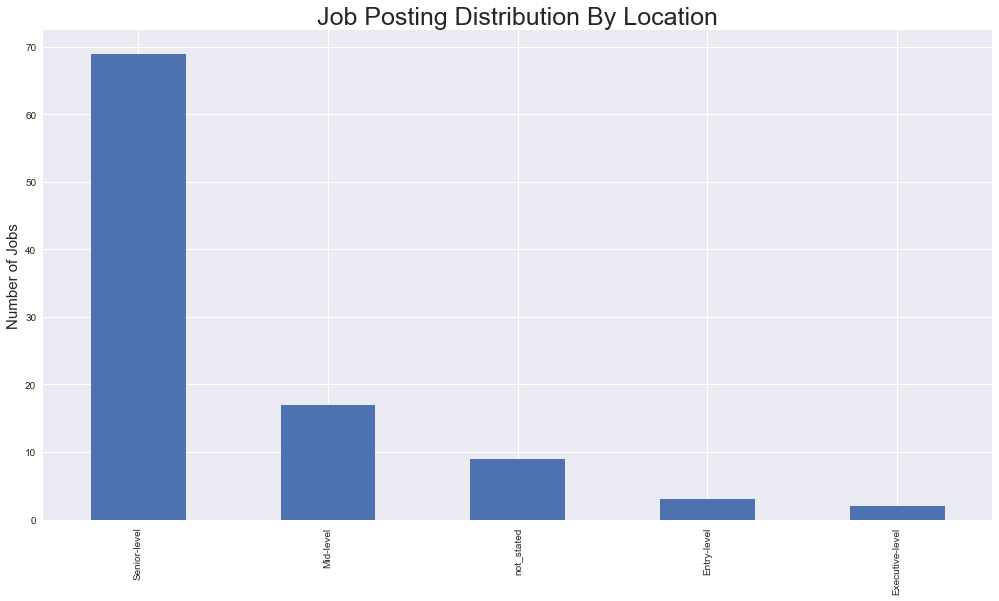

In [39]:
barplot(df['level'], 'Job Posting Distribution By Location', 'Number of Jobs')

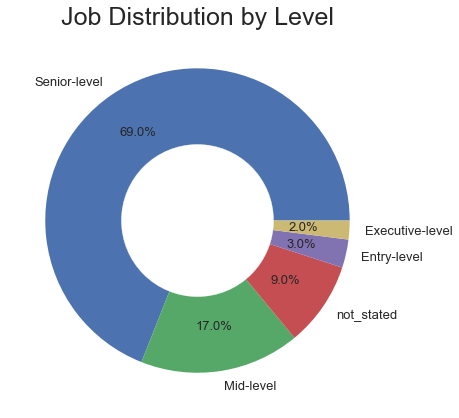

In [40]:
# Plot pie chart to display percentage of job distribution by level

# define lables to use
labels = df['level'].value_counts().keys()
# define figure size
plt.figure(figsize=(9,7))
# plot dataset of interest
plt.pie(df['level'].value_counts(), labels=labels, autopct='%1.1f%%', pctdistance=0.7, textprops={'fontsize':13})

# plot circle to change pie chart above to doughnut chart
inner_circle = plt.Circle((0,0), 0.5, color = 'White')
# get current figure i.e. pie chart above
plot_figure = plt.gcf() # gcf means "get current figure"
# get current axes and imprint plot circle on pie chart
plot_figure.gca().add_artist(inner_circle) # gca means "get current axis"
# define chart tile
plt.title('Job Distribution by Level', fontsize=25);

Comment

    Most job postings are senior-level or Mid level i.e. 69 % and 17 % respectively. Only 3 % turned out to be labelled 
    Entry level, however, it could be that the 9 % whose levels were not stated might be entry levels. So try your luck 
    regardless.